Data is directly taken from the FuelEconomy.gov from U.S. Department of Energy.

Questions to be explored?

* Which manufacturer produces the most fuel efficient fleet of cars (type_1 & type_2)?

* Build a model to predict city mpg (variable “UCity” in column BG).

* One post has been posted on the Medium [here](https://jyi3.medium.com/how-to-conduct-data-science-based-on-the-business-context-239cf934cee8)

# Outline

## 1. Exploratory Data Analysis
* Business Understanding
* Data Understanding

## 2. Build a model to predict city mpg (variable “UCity” in column BG)
* Prepare Data
* Data Modeling
* Evaluate the Results

## 3. Conclusion

# 1. Exploratory Data Analysis

--> Understand each features and how they are related to our target problems

--> Basic visualization of raw data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import time

In [2]:
vehicles = pd.read_csv('vehicles.csv', low_memory=False)

In [3]:
vehicles.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


## 1.1 Feature interpretation

In [4]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Data columns (total 83 columns):
barrels08          40081 non-null float64
barrelsA08         40081 non-null float64
charge120          40081 non-null float64
charge240          40081 non-null float64
city08             40081 non-null int64
city08U            40081 non-null float64
cityA08            40081 non-null int64
cityA08U           40081 non-null float64
cityCD             40081 non-null float64
cityE              40081 non-null float64
cityUF             40081 non-null float64
co2                40081 non-null int64
co2A               40081 non-null int64
co2TailpipeAGpm    40081 non-null float64
co2TailpipeGpm     40081 non-null float64
comb08             40081 non-null int64
comb08U            40081 non-null float64
combA08            40081 non-null int64
combA08U           40081 non-null float64
combE              40081 non-null float64
combinedCD         40081 non-null float64
combinedUF         40

* A brief description of each feature is listed in the following. The detailed information can be accessed with https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle
* barrels08 - annual petroleum consumption in barrels for fuelType1 (1)
* barrelsA08 - annual petroleum consumption in barrels for fuelType2 (1)
* charge120 - time to charge an electric vehicle in hours at 120 V
* charge240 - time to charge an electric vehicle in hours at 240 V
* city08 - city MPG for fuelType1 (2), (11)
* city08U - unrounded city MPG for fuelType1 (2), (3)
* cityA08 - city MPG for fuelType2 (2)
* cityA08U - unrounded city MPG for fuelType2 (2), (3)
* cityCD - city gasoline consumption (gallons/100 miles) in charge depleting mode (4)
* cityE - city electricity consumption in kw-hrs/100 miles
* cityUF - EPA city utility factor (share of electricity) for PHEV
* co2 - tailpipe CO2 in grams/mile for fuelType1 (5)
* co2A - tailpipe CO2 in grams/mile for fuelType2 (5)
* co2TailpipeAGpm - tailpipe CO2 in grams/mile for fuelType2 (5)
* co2TailpipeGpm- tailpipe CO2 in grams/mile for fuelType1 (5)
* comb08 - combined MPG for fuelType1 (2), (11)
* comb08U - unrounded combined MPG for fuelType1 (2), (3)
* combA08 - combined MPG for fuelType2 (2)
* combA08U - unrounded combined MPG for fuelType2 (2), (3)
* combE - combined electricity consumption in kw-hrs/100 miles
* combinedCD - combined gasoline consumption (gallons/100 miles) in charge depleting mode (4)
* combinedUF - EPA combined utility factor (share of electricity) for PHEV
* cylinders - engine cylinders
* displ - engine displacement in liters
* drive - drive axle type
* emissionsList
* engId - EPA model type index
* eng_dscr - engine descriptor; see http://www.fueleconomy.gov/feg/findacarhelp.shtml#engine
* evMotor - electric motor (kw-hrs)
* feScore - EPA Fuel Economy Score (-1 = Not available)
* fuelCost08 - annual fuel cost for fuelType1 ($) (7)
* fuelCostA08 - annual fuel cost for fuelType2 ($) (7)
* fuelType - fuel type with fuelType1 and fuelType2 (if applicable)
* fuelType1 - fuel type 1. For single fuel vehicles, this will be the only fuel. For dual fuel vehicles, this will be the conventional fuel.
* fuelType2 - fuel type 2. For dual fuel vehicles, this will be the alternative fuel (e.g. E85, Electricity, CNG, LPG). For single fuel vehicles, this field is not used
* ghgScore - EPA GHG score (-1 = Not available)
* ghgScoreA - EPA GHG score for dual fuel vehicle running on the alternative fuel (-1 = Not available)
* guzzler- if G or T, this vehicle is subject to the gas guzzler tax
* highway08 - highway MPG for fuelType1 (2), (11)
* highway08U - unrounded highway MPG for fuelType1 (2), (3)
* highwayA08 - highway MPG for fuelType2 (2)
* highwayA08U - unrounded highway MPG for fuelType2 (2),(3)
* highwayCD - highway gasoline consumption (gallons/100miles) in charge depleting mode (4)
* highwayE - highway electricity consumption in kw-hrs/100 miles
* highwayUF - EPA highway utility factor (share of electricity) for PHEV
* hlv - hatchback luggage volume (cubic feet) (8)
* hpv - hatchback passenger volume (cubic feet) (8)
* id - vehicle record id
* lv2 - 2 door luggage volume (cubic feet) (8)
* lv4 - 4 door luggage volume (cubic feet) (8)
* make - manufacturer (division)
* mfrCode - 3-character manufacturer code
* model - model name (carline)
* mpgData - has My MPG data; see yourMpgVehicle and yourMpgDriverVehicle
* phevBlended - if true, this vehicle operates on a blend of gasoline and electricity in charge depleting mode
* pv2 - 2-door passenger volume (cubic feet) (8)
* pv4 - 4-door passenger volume (cubic feet) (8)
* rangeA - EPA range for fuelType2
* rangeCityA - EPA city range for fuelType2
* rangeHwyA - EPA highway range for fuelType2
* trans_dscr - transmission descriptor; see http://www.fueleconomy.gov/feg/findacarhelp.shtml#trany
* trany - transmission
* UCity - unadjusted city MPG for fuelType1; see the description of the EPA test procedures
* UCityA - unadjusted city MPG for fuelType2; see the description of the EPA test procedures
* UHighway - unadjusted highway MPG for fuelType1; see the description of the EPA test procedures
* UHighwayA - unadjusted highway MPG for fuelType2; see the description of the EPA test procedures
* VClass - EPA vehicle size class
* year - model year
* youSaveSpend - you save/spend over 5 years compared to an average car ($). Savings are positive; a greater amount spent yields a negative number. For dual fuel vehicles, this is the cost savings for gasoline
* sCharger - if S, this vehicle is supercharged
* tCharger - if T, this vehicle is turbocharged
* c240Dscr - electric vehicle charger description
* charge240b - time to charge an electric vehicle in hours at 240 V using the alternate charger
* c240bDscr - electric vehicle alternate charger description
* createdOn - date the vehicle record was created (ISO 8601 format)
* modifiedOn - date the vehicle record was last modified (ISO 8601 format)
* startStop - vehicle has start-stop technology (Y, N, or blank for older vehicles)
* phevCity - EPA composite gasoline-electricity city MPGe for plug-in hybrid vehicles
* phevHwy - EPA composite gasoline-electricity highway MPGe for plug-in hybrid vehicles
* phevComb - EPA composite gasoline-electricity combined city-highway MPGe for plug-in hybrid vehicles

## 1.2 Vehicle analysis

In [5]:
vehicles.make.unique()

array(['Alfa Romeo', 'Ferrari', 'Dodge', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'CX Automotive', 'Nissan', 'Ford', 'Hyundai',
       'Infiniti', 'Lexus', 'Mercury', 'Mazda', 'Oldsmobile', 'Plymouth',
       'Pontiac', 'Rolls-Royce', 'Eagle', 'Lincoln', 'Mercedes-Benz',
       'GMC', 'Saab', 'Honda', 'Saturn', 'Mitsubishi', 'Isuzu', 'Jeep',
       'AM General', 'Geo', 'Suzuki', 'E. P. Dutton, Inc.', 'Land Rover',
       'PAS, Inc', 'Acura', 'Jaguar', 'Lotus', 'Grumman Olson', 'Porsche',
       'American Motors Corporation', 'Kia', 'Lamborghini',
       'Panoz Auto-Development', 'Maserati', 'Saleen', 'Aston Martin',
       'Dabryan Coach Builders Inc', 'Federal Coach', 'Vector', 'Bentley',
       'Daewoo', 'Qvale', 'Roush Performance', 'Autokraft Limited',
       'Bertone', 'Panther Car Company Limited', 'Texas Coach Company',
       'TVR Engineering Ltd', 'Morgan', 'MINI', 'Yugo', 'BMW Alpina',
       'Renaul

In [6]:
print(vehicles.make.value_counts().head(10))
print(vehicles.make.value_counts().tail(10))

Chevrolet        3944
Ford             3284
Dodge            2559
GMC              2471
Toyota           2010
BMW              1856
Mercedes-Benz    1444
Nissan           1424
Volkswagen       1155
Mitsubishi       1052
Name: make, dtype: int64
Panoz Auto-Development              1
Aurora Cars Ltd                     1
ASC Incorporated                    1
JBA Motorcars, Inc.                 1
London Coach Co Inc                 1
Excalibur Autos                     1
Mahindra                            1
Superior Coaches Div E.p. Dutton    1
Volga Associated Automobile         1
Shelby                              1
Name: make, dtype: int64


For future reference, maker with too few value_counts could be dropped to optimize the model.

In [7]:
fuel_type = vehicles.fuelType.value_counts()
print(fuel_type)

Regular                        25997
Premium                        11067
Gasoline or E85                 1287
Diesel                          1142
Electricity                      168
Premium or E85                   125
Midgrade                         100
CNG                               60
Premium and Electricity           47
Regular Gas and Electricity       29
Premium Gas or Electricity        28
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         3
Name: fuelType, dtype: int64


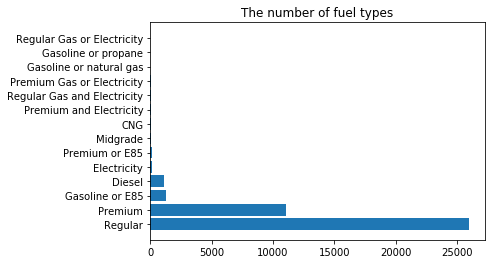

In [8]:
plt.barh(fuel_type.index, fuel_type)
plt.title('The number of fuel types')
plt.show()

In [9]:
vehicles.fuelType1.value_counts()

Regular Gasoline     27344
Premium Gasoline     11267
Diesel                1142
Electricity            168
Midgrade Gasoline      100
Natural Gas             60
Name: fuelType1, dtype: int64

In [10]:
vehicles.fuelType2.value_counts()

E85            1412
Electricity     107
Natural Gas      20
Propane           8
Name: fuelType2, dtype: int64

In [11]:
vehicles.fuelType.isnull().sum()

0

In [12]:
vehicles.fuelType1.isnull().sum()

0

In [13]:
vehicles.fuelType2.isnull().sum()

38534

In [14]:
vehicles['fuelType2'].isnull().sum()

38534

In [15]:
vehicles.mpgData.value_counts()

N    27367
Y    12714
Name: mpgData, dtype: int64

The first two questiosn can be answered via the pivot of the dataframe.

## 1.3 Which manufacturer produces the most fuel-efficient fleet of type-1 cars?

In [16]:
max_name_1 = list(vehicles.make[vehicles.comb08 == vehicles.comb08.max()])[0]
max_mpg_1 = vehicles.comb08.max()
print('The maximum mpg is {} for type 1, and the car is manufactured by {}.'.format(max_mpg_1, max_name_1))

The maximum mpg is 136 for type 1, and the car is manufactured by Hyundai.


## 1.4 Which manufacturer produces the most fuel-efficient fleet of type-2 cars?

In [17]:
max_name_2 = list(vehicles.make[vehicles.combA08 == vehicles.combA08.max()])[0]
max_mpg_2 = vehicles.combA08.max()
print('The maximum mpg is {} for type 2, and the car is manufactured by {}.'.format(max_mpg_2, max_name_2))

The maximum mpg is 133 for type 2, and the car is manufactured by Toyota.


# 2. Build a model to predict city mpg (variable “UCity” in column BG)

--> Model with only numeric (float & int) features

--> Model with all features

## Model selection -- Regression

* [Linear model](https://scikit-learn.org/stable/modules/linear_model.html#)
* [Supporting Vector Machine](https://scikit-learn.org/stable/modules/svm.html)
* [Tree](https://scikit-learn.org/stable/modules/tree.html)

In [18]:
# copy dataframe to further process
df = vehicles.copy()

In [19]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [20]:
df.UCity.describe()

count    40081.000000
mean        22.981798
std         10.473444
min          0.000000
25%         18.110500
50%         21.296500
75%         25.700000
max        224.800000
Name: UCity, dtype: float64

224.8 mpg? Is this possible? We will need to further check.
* As shown in the following graph, most likely, the data with MPG over 100.

C:\Users\yijia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


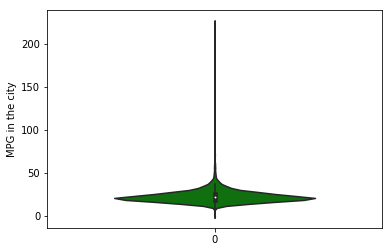

In [21]:
sns.violinplot(data=df.UCity,whis=[0, 100], width=.6, color="green")
plt.ylabel('MPG in the city')
plt.show()

## 2.1 Drop columns with more than half Null values

In [22]:
lis = list(df.columns)
lis_1 =[]
for col in lis:
    #print(col)
    if df[col].isnull().sum() > 20000:
        #print(df[col].isnull().sum() > 20000)
        lis_1.append(col)
    else:
        pass 
print(lis_1)

['guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'startStop']


In [23]:
df_1 = df.drop(columns = lis_1)

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Data columns (total 71 columns):
barrels08          40081 non-null float64
barrelsA08         40081 non-null float64
charge120          40081 non-null float64
charge240          40081 non-null float64
city08             40081 non-null int64
city08U            40081 non-null float64
cityA08            40081 non-null int64
cityA08U           40081 non-null float64
cityCD             40081 non-null float64
cityE              40081 non-null float64
cityUF             40081 non-null float64
co2                40081 non-null int64
co2A               40081 non-null int64
co2TailpipeAGpm    40081 non-null float64
co2TailpipeGpm     40081 non-null float64
comb08             40081 non-null int64
comb08U            40081 non-null float64
combA08            40081 non-null int64
combA08U           40081 non-null float64
combE              40081 non-null float64
combinedCD         40081 non-null float64
combinedUF         40

In [25]:
# drop meaningless columns in the dataset
df_1 = df_1.drop(columns = ['createdOn', 'modifiedOn'], axis =1)

### Evaluation [metric](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation)

* r2_score 
  Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
  
* explained_variance_score
  Best possible score is 1.0, lower values are worse
  
* mean_absolute_error
  The lower, the better.
  
* mean_squared_error
  The lower, the better.

In [26]:
def print_metrix(y_test,y_pred, total_time):
    """This function is to print the evaulation metrix of machine learning model
    """
    print('r2_score: '+ str(r2_score(y_test,y_pred)))
    print('explained_variance_score: '+ str(explained_variance_score(y_test,y_pred)))
    print('mean_absolute_error: '+ str(mean_absolute_error(y_test,y_pred)))
    print('mean_squared_error: '+ str(mean_squared_error(y_test,y_pred)))
    print('The total time for the model training: ' + str(total_time) + ' S.')

## 2.2 Model based on the numeric data (float and int)

In [27]:
df_3 = df_1.select_dtypes(include=['float64', 'int64'])

In [28]:
# For each numeric variable in X, fill the column with the mean value of the column.
# Filling null value with mean could dilute the feature
num_vars = df_3.columns
for num_var in num_vars:
    df_3[num_var].fillna((df_3[num_var].mean()), inplace=True)

C:\Users\yijia\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [29]:
y_1 = df_3['UCity']
X_1 = df_3.drop(columns= 'UCity', axis = 1)

In [30]:
#Split into train and test
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = .30, random_state=42) 

linear_model [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

In [31]:
# start time
start = time.time()
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train_1, y_train_1)

y_pred_lin = reg.predict(X_test_1)

# end time
end = time.time()

total_time = end - start

In [32]:
print('The evaluation metrics of ' + 'Linear regression' + ':')
print_metrix(y_test_1, y_pred_lin, total_time)

The evaluation metrics of Linear regression:
r2_score: 0.9974470837233627
explained_variance_score: 0.9974472426894514
mean_absolute_error: 0.35476214756678076
mean_squared_error: 0.2655512812407401
The total time for the model training: 0.1297307014465332 S.


SVM [regression](https://scikit-learn.org/stable/modules/svm.html#regression)

* It takes much longer time than Linear model and decision tree

In [33]:
# start time
start = time.time()

from sklearn import svm
regr = svm.SVR(gamma = 'auto')

regr.fit(X_train_1, y_train_1)

y_pred_1 = regr.predict(X_test_1)

# end time
end = time.time()

total_time = end - start

In [34]:
print('The evaluation metrics of ' + 'SVM' + ':')
print_metrix(y_test_1, y_pred_1,total_time)

The evaluation metrics of SVM:
r2_score: 0.009908238103526701
explained_variance_score: 0.03476079425642109
mean_absolute_error: 4.833380582896554
mean_squared_error: 102.98815449750074
The total time for the model training: 186.66455221176147 S.


Decision Tree [Regression](https://scikit-learn.org/stable/modules/tree.html#regression)

In [35]:
# start time
start = time.time()

from sklearn import tree
clf = tree.DecisionTreeRegressor()

clf.fit(X_train_1, y_train_1)

y_pred_2 = clf.predict(X_test_1)

# end time
end = time.time()

total_time = end - start

In [36]:
print('The evaluation metrics of ' + 'decision tree' + ':')
print_metrix(y_test_1, y_pred_2,total_time)

The evaluation metrics of decision tree:
r2_score: 0.9984326398405395
explained_variance_score: 0.9984328746718416
mean_absolute_error: 0.12323890291891106
mean_squared_error: 0.16303491905290152
The total time for the model training: 0.5630803108215332 S.


## 2.3 Model with all features

* Enumerate categorical features

In [37]:
df_2 = pd.get_dummies(df_1)

In [38]:
df_2.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,VClass_Standard Pickup Trucks 4WD,VClass_Standard Pickup Trucks/2wd,VClass_Standard Sport Utility Vehicle 2WD,VClass_Standard Sport Utility Vehicle 4WD,VClass_Subcompact Cars,VClass_Two Seaters,VClass_Vans,VClass_Vans Passenger,"VClass_Vans, Cargo Type","VClass_Vans, Passenger Type"
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40081 entries, 0 to 40080
Columns: 4806 entries, barrels08 to VClass_Vans, Passenger Type
dtypes: bool(1), float64(32), int64(27), uint8(4746)
memory usage: 199.5 MB


In [40]:
df_2.UCity.describe()

count    40081.000000
mean        22.981798
std         10.473444
min          0.000000
25%         18.110500
50%         21.296500
75%         25.700000
max        224.800000
Name: UCity, dtype: float64

C:\Users\yijia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


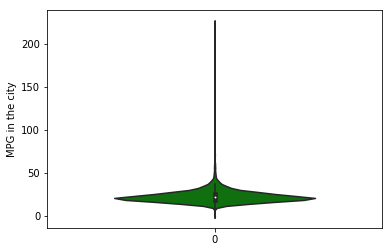

In [41]:
sns.violinplot(data=df_2.UCity,whis=[0, 100], width=.6, color="green")
plt.ylabel('MPG in the city')
plt.show()

In [42]:
# For each numeric variable in X, fill the column with the mean value of the column.
num_vars = df_2.columns
for num_var in num_vars:
    df_2[num_var].fillna((df_2[num_var].mean()), inplace=True)

In [43]:
y = df_2['UCity']
X = df_2.drop(columns= 'UCity', axis = 1)

In [44]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

linear_model [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

In [49]:
# start time
start = time.time()

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

y_pred_lin_all = reg.predict(X_test)

# end time
end = time.time()

total_time = end - start

In [50]:
print('The evaluation metrics of ' + 'Linear Regression' + ':')
print_metrix(y_test, y_pred_lin_all,total_time)

The evaluation metrics of Linear Regression:
r2_score: 0.2541095003017706
explained_variance_score: 0.25436577947834293
mean_absolute_error: 0.6249547780811898
mean_squared_error: 77.58663285309869
The total time for the model training: 82.65471315383911 S.


SVM [regression](https://scikit-learn.org/stable/modules/svm.html#regression)

In [ ]:
# start time
start = time.time()

from sklearn import svm
regr = svm.SVR(gamma = 'auto')

regr.fit(X_train, y_train)

y_pred_svm_all = regr.predict(X_test)

# end time
end = time.time()

total_time = end - start

In [ ]:
print('SVM for all the feature:')
print_metrix(y_test, y_pred_svm_all,total_time)

The SVM tooks too long.

Decision Tree [Regression](https://scikit-learn.org/stable/modules/tree.html#regression)

In [47]:
# start time
start = time.time()

clf = tree.DecisionTreeRegressor()

clf.fit(X_train, y_train)

y_pred_tree_all = clf.predict(X_test)

# end time
end = time.time()

total_time = end - start

In [48]:
print('The evaluation metrics of ' + 'decision tree' + ':')
print_metrix(y_test, y_pred_tree_all,total_time)

The evaluation metrics of decision tree:
r2_score: 0.9987153910689179
explained_variance_score: 0.9987157017418185
mean_absolute_error: 0.11498840217996291
mean_squared_error: 0.13362347628237908
The total time for the model training: 11.55288028717041 S.


# 3.Conclusion
* The Linear Model and Decision Tree have both good accuracy and effeciency.
* Only numeric values are good enough to train the model with over 99%
* All features can make Decision tree better but Linear Model worse.